# Question 1

In [1]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [2]:
data <- read.csv("/content/question_1.csv")
#data <- read.csv("/content/question_3.csv")

Warning message in file(file, "rt"):
“cannot open file '/content/question_1.csv': No such file or directory”


ERROR: ignored

In [ ]:
head(data)

,X,x
,<int>,<dbl>
1,1,-0.05150143
2,2,1.27982981
3,3,-1.94777180
4,4,-0.56169870
5,5,4.14780357
6,6,1.76098845


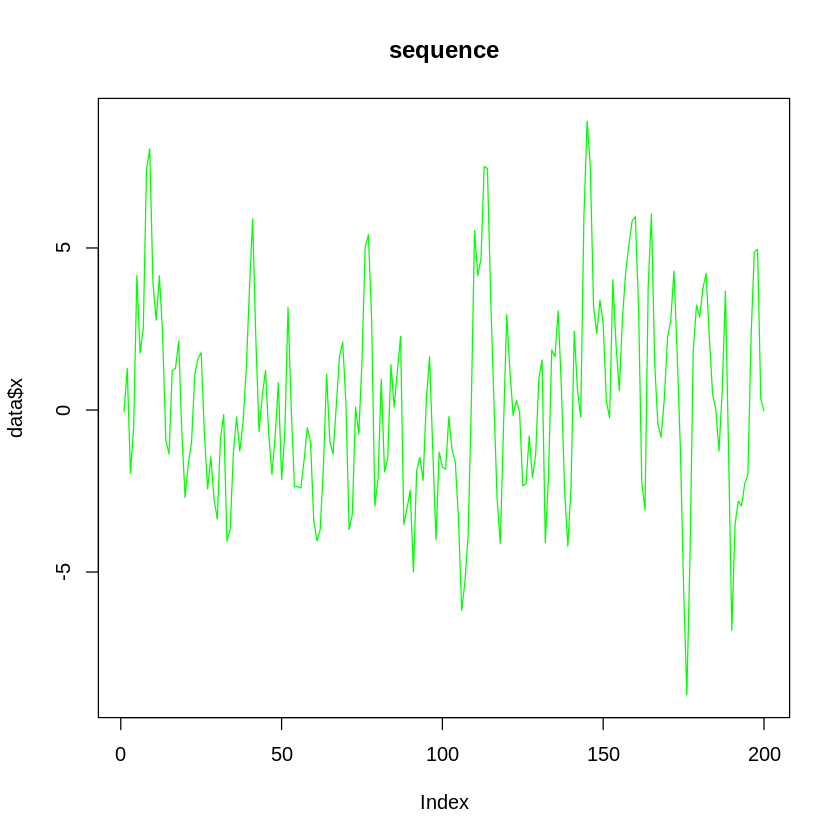

In [ ]:
plot(data$x, col='green',main='sequence',type='l')

ACF - для MA

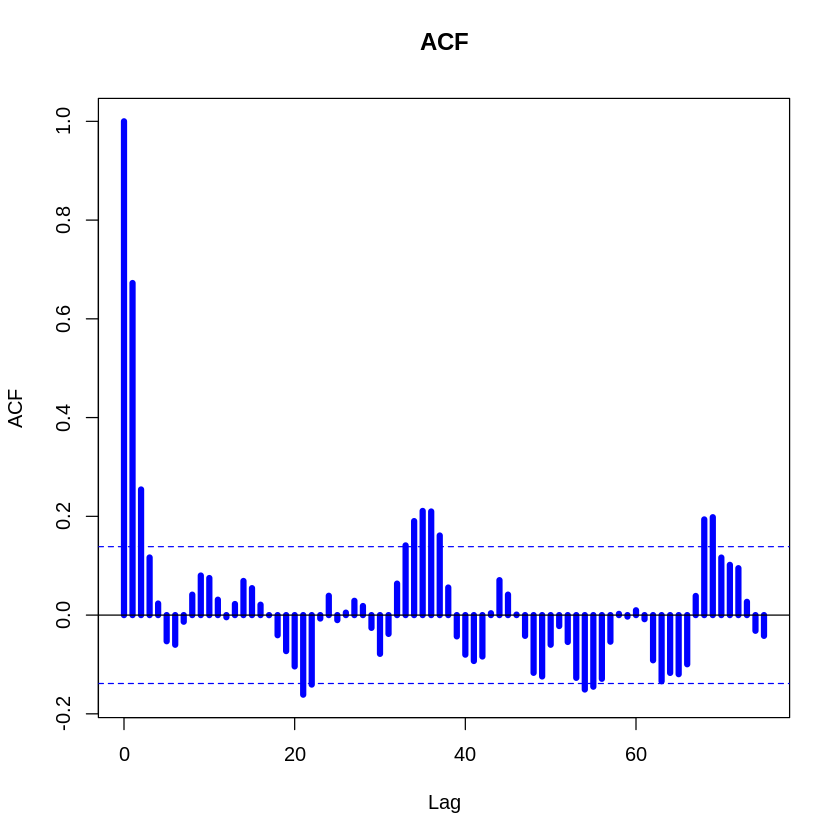

In [ ]:
acf(data$x,lwd = 5, col = "blue", main = "ACF",  lag.max=75)

может быть MA(2) - над нулем не считаем, сезонность 1 и период 21

PACF для AR

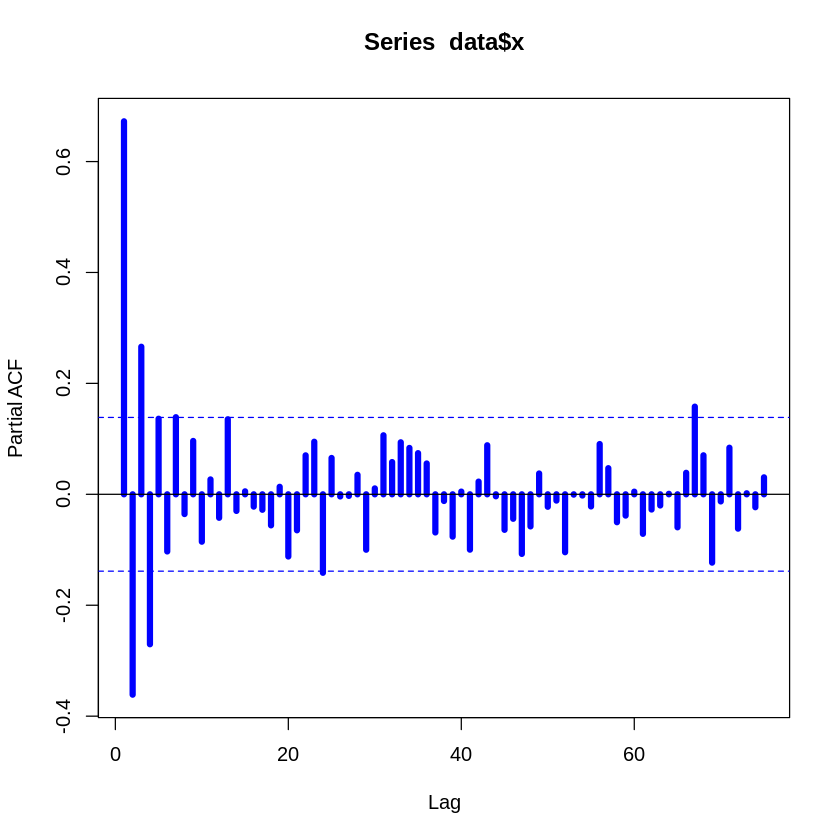

In [ ]:
pacf(data$x,lwd = 5, col = "blue", lag.max=75)

AR(4), без сезонности. но порядок выше чем MA(2)

In [ ]:
eacf(data$x)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o x o o o o o o o  o  o  o 
3 x x x x o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  o  o 
5 x o x o x o o o o o o  o  o  o 
6 x x x x o x o o o o o  o  o  o 
7 x x x o o o o o o o o  o  o  o 


можно взять ARMA(1, 1) еще

Оценка методом максимального правдоподобия

In [ ]:
ml1 <-  arima(data$x,order = c(0,0,2),method="ML") # (AR, 0, MA)
ml1$coef

ma1       ma2 intercept 
1.2458991 0.2459001 0.2843264

Условный метод наименьших квадратов

In [ ]:
css1 <-  arima(data$x,order = c(0,0,2),method="CSS") # (AR, 0, MA)
css1$coef

ma1       ma2 intercept 
1.2094528 0.2681155 0.1206154

In [ ]:
#Метод моментов (только для AR(p) моделей) с автоматическим выбором порядка модели по критерию Акаике

yw1 <- ar(data$x,method="yule-walker")
yw1$order

[1] 7

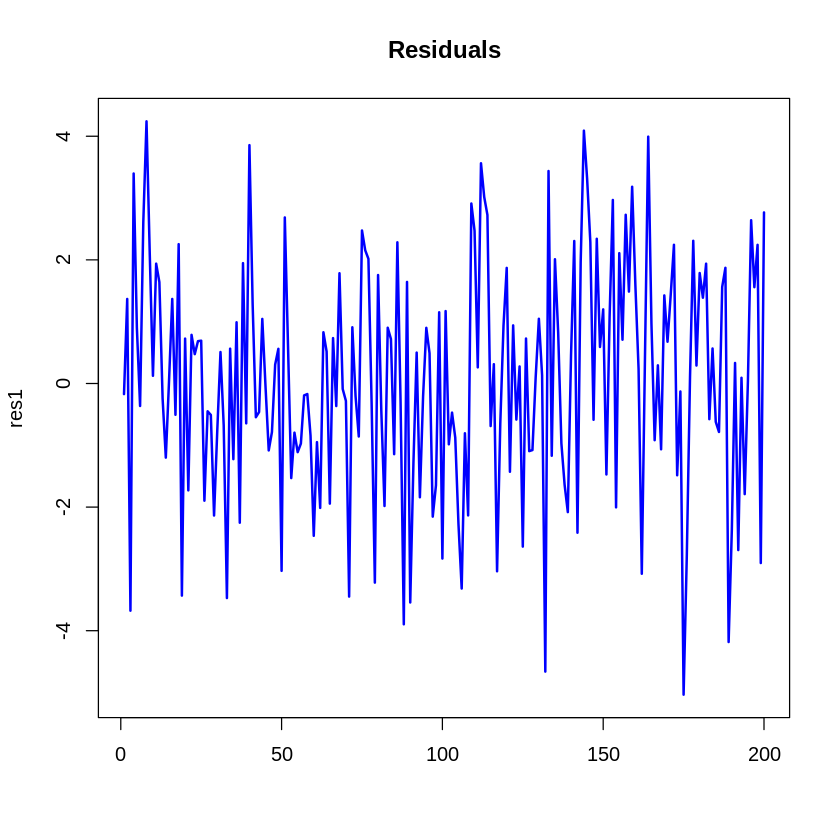

In [ ]:
res1 <- css1$residuals
matplot(res1,lwd=2,type="l",col="blue",main="Residuals")

Пример использования теста Льюнг-Бокса для проверки 6 первых автокорреляций остатков. проверяется гипотеза случайности- независимости и одинаковой распределенности, но не в исходных данных, а именно в остатках после удаления модели ARMA

In [ ]:
Box.test(res1, lag = 6, type = "Ljung-Box", fitdf = 2) # fitdf = sum(AR, 0, MA)


	Box-Ljung test

data:  res1
X-squared = 4.1746, df = 4, p-value = 0.3829


p-value > 0.05 - не отвергаем некоррелированность остатков

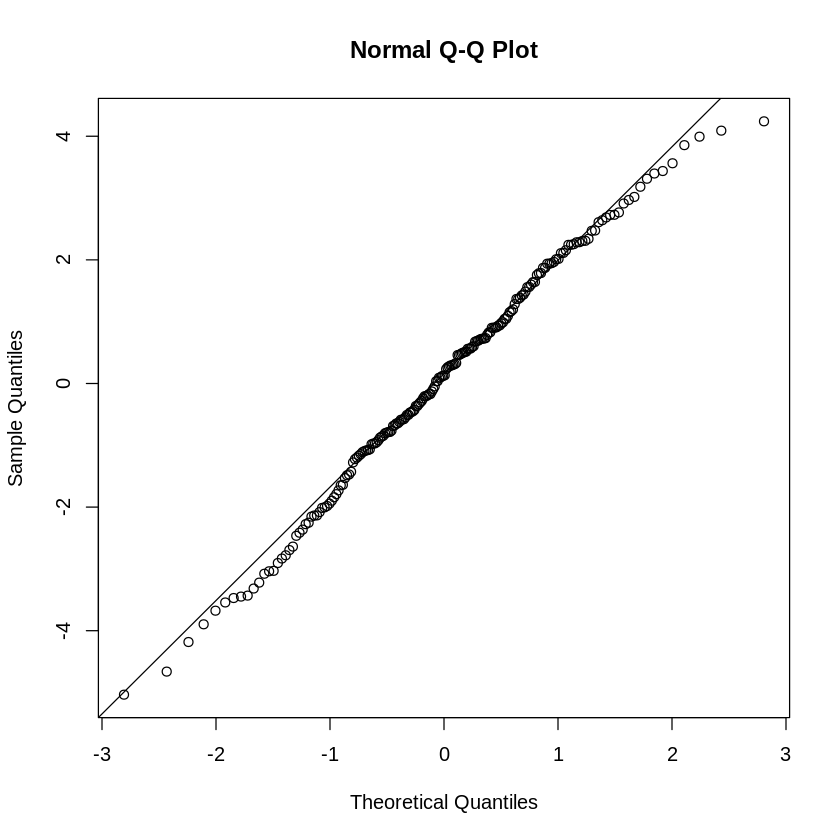

In [ ]:
qqnorm(res1)
qqline(res1)

Если в остатках белый шум, то значение ACF остатков должны лежать в пределах $1/\sqrt{n}$

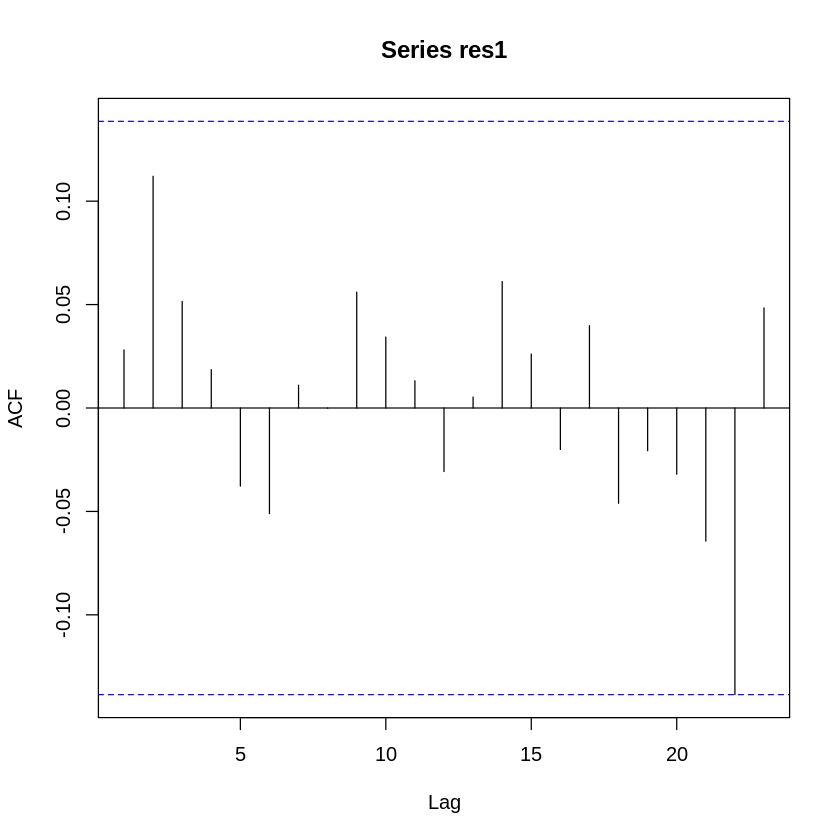

In [ ]:
acf(res1)

белый шум

In [ ]:
css2 <-  arima(data$x,order = c(1,0,1),method="CSS") # (AR, 0, MA)
css2$coef

ar1       ma1 intercept 
0.3122206 0.9346403 0.4118794

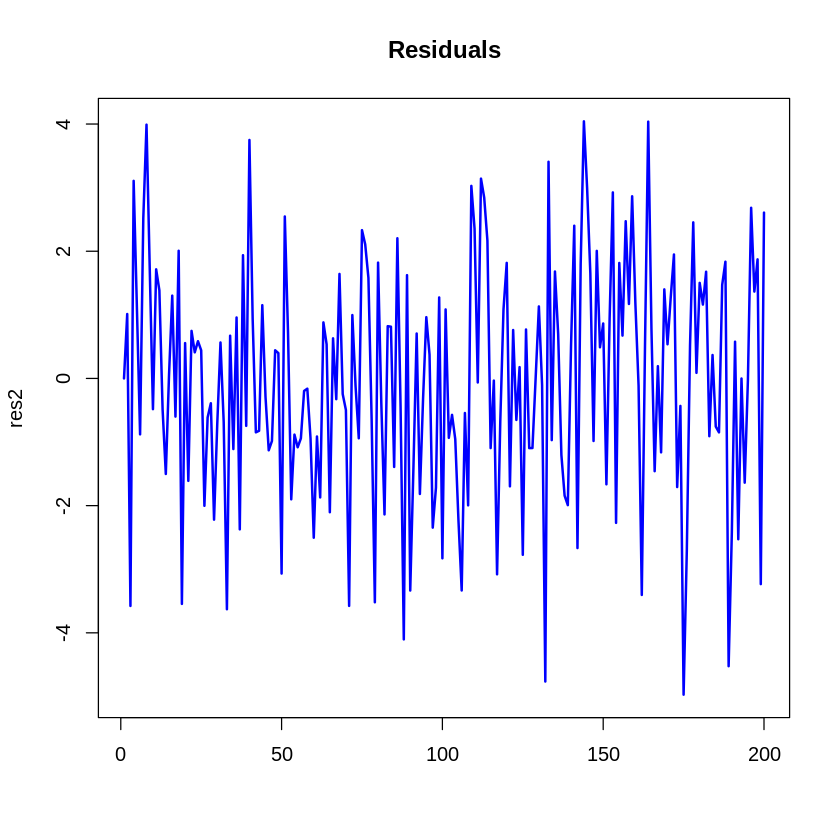

In [ ]:
res2 <- css2$residuals
matplot(res2,lwd=2,type="l",col="blue",main="Residuals")

проведем тест Льюнг-Бокса остатков и постром qq-график

In [ ]:
Box.test(res2, lag = 6, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  res2
X-squared = 1.5981, df = 4, p-value = 0.8091


p-value > 0.05 - не отвергаем некоррелированность остатков

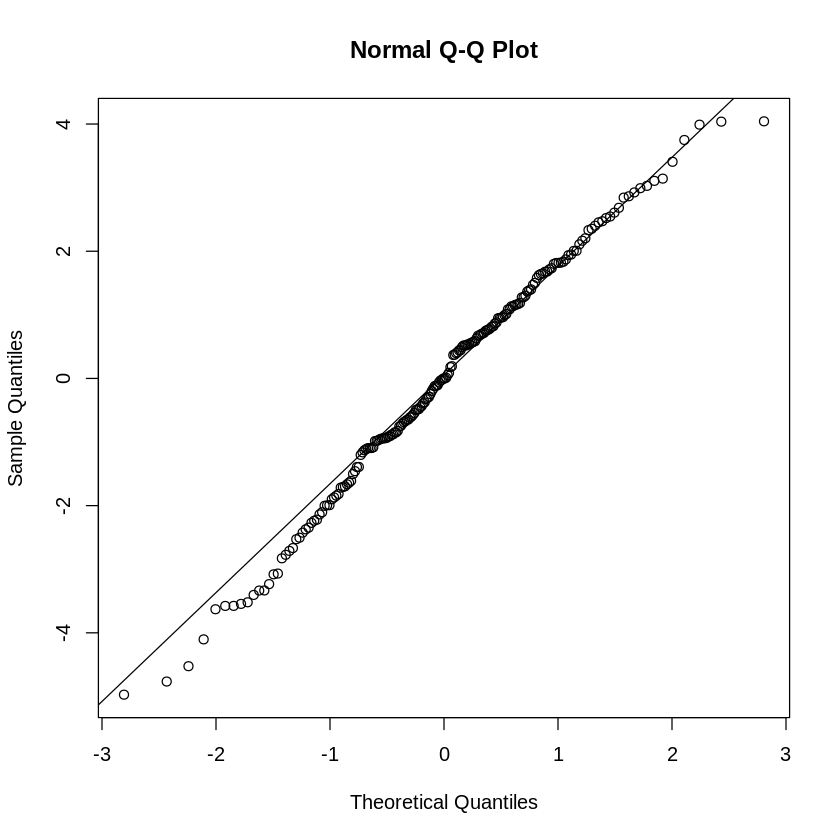

In [ ]:
qqnorm(res2)
qqline(res2)

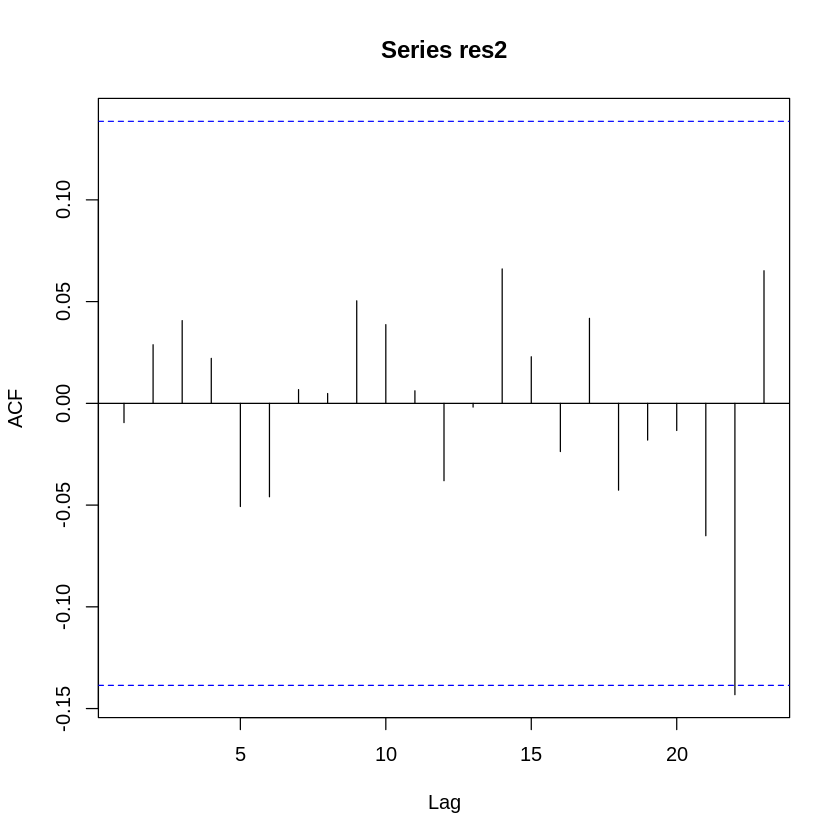

In [ ]:
acf(res2)

In [ ]:
css3 <-  arima(data$x,order = c(5,0,0),method="CSS") # (AR, 0, MA)
css3$coef

ar1        ar2        ar3        ar4        ar5  intercept 
 1.1370099 -0.8621264  0.6622919 -0.4302390  0.1413771  0.2515928

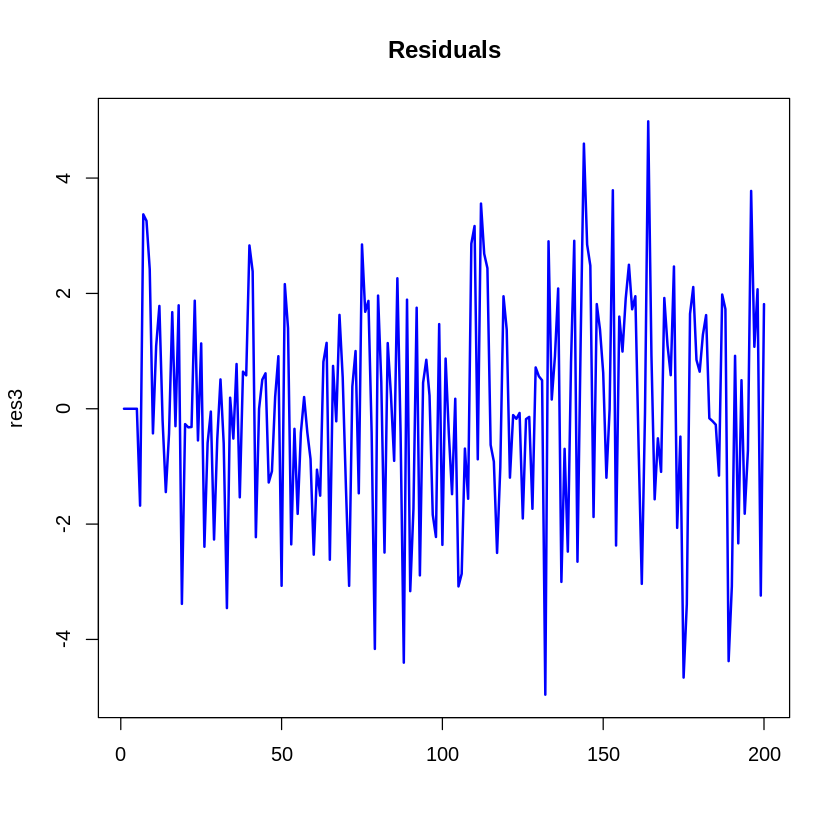

In [ ]:
res3 <- css3$residuals
matplot(res3,lwd=2,type="l",col="blue",main="Residuals")

In [ ]:
Box.test(res3, lag = 6, type = "Ljung-Box", fitdf = 5)


	Box-Ljung test

data:  res3
X-squared = 8.2416, df = 1, p-value = 0.004094


p-value < 0.05 - отвергаем некоррелированность остатков

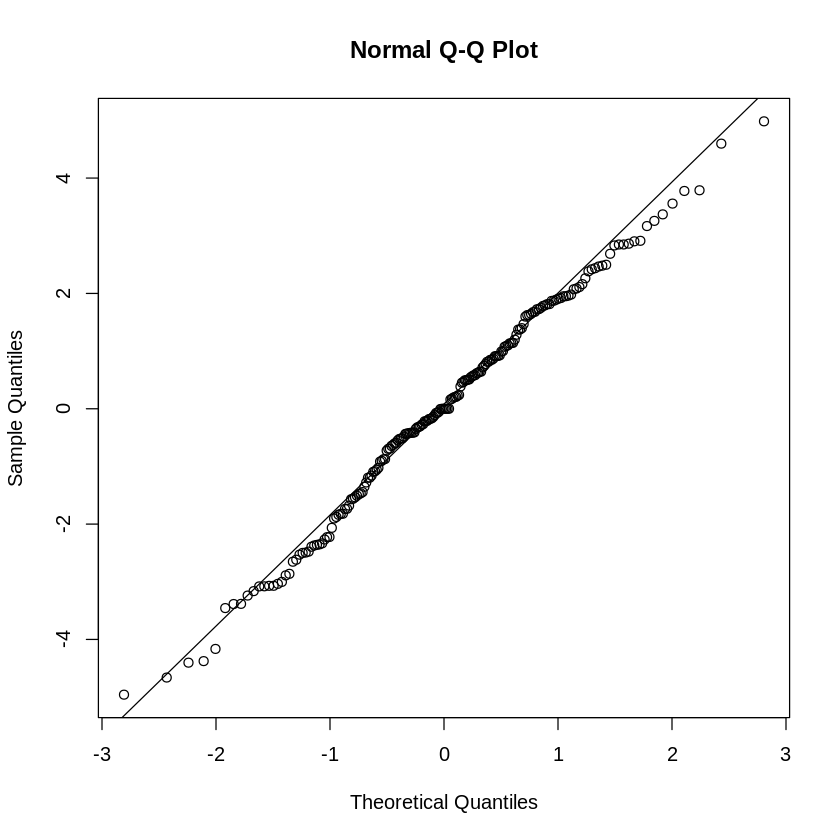

In [ ]:
qqnorm(res3)
qqline(res3)

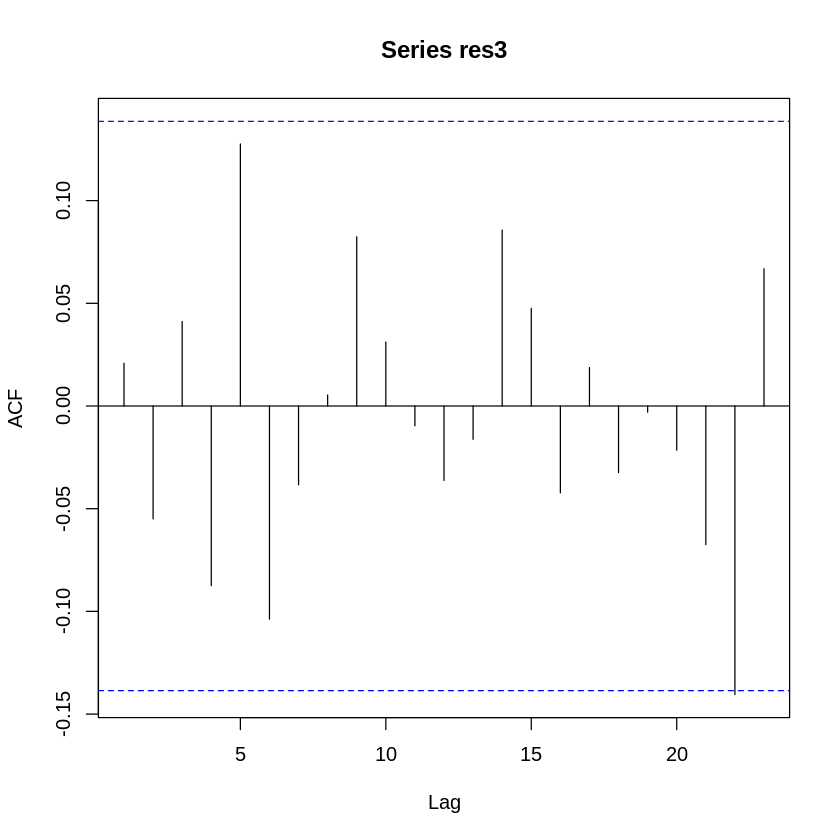

In [ ]:
acf(res3)

Считается, что наилучшей будет модель с наименьшим значением критерия AIC.

In [ ]:
ml_ma2 <-  arima(data$x,order = c(0,0,2),method="ML")
ml_ar5 <-  arima(data$x,order = c(5,0,0),method="ML")
ml_ar1_1 <-  arima(data$x,order = c(1,0,1),method="ML")

In [ ]:
ml_ar1_1$aic

[1] 818.1636

In [ ]:
ml_ar5$aic

[1] 842.6605

In [ ]:
ml_ma2$aic

[1] 821.1796

чем меньше критерий Акаике - тем лучше

ARMA(1, 1) - кажется лучшая

In [ ]:
model1 <- arima(data$x, order = c(1,0,1), seasonal = list(order= c(0,0,1),period = 37),method = "ML")

In [ ]:
model1$aic

[1] 817.2221

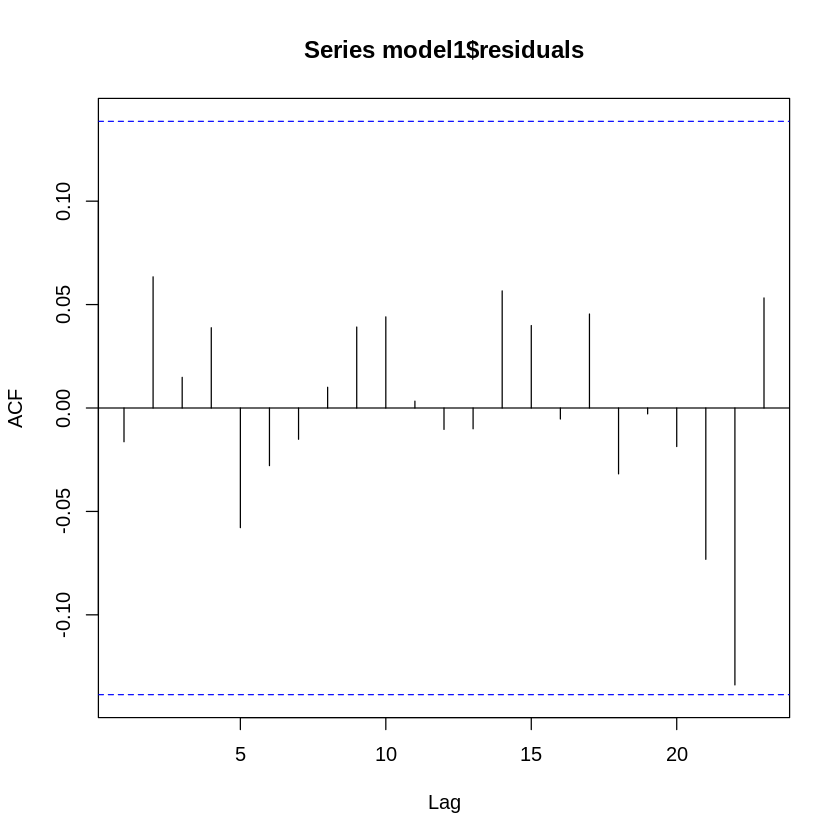

In [ ]:
acf(model1$residuals)

сезонная лучше (1, 0, 1) (0, 0, 1) period = 37

# Question 3

In [ ]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [7]:
data <- read.csv("/content/question_3.csv")

In [8]:
head(data)

,X,x
,<int>,<dbl>
1,1,1.784468
2,2,1.945506
3,3,2.001424
4,4,2.776237
5,5,3.244034
6,6,2.528391


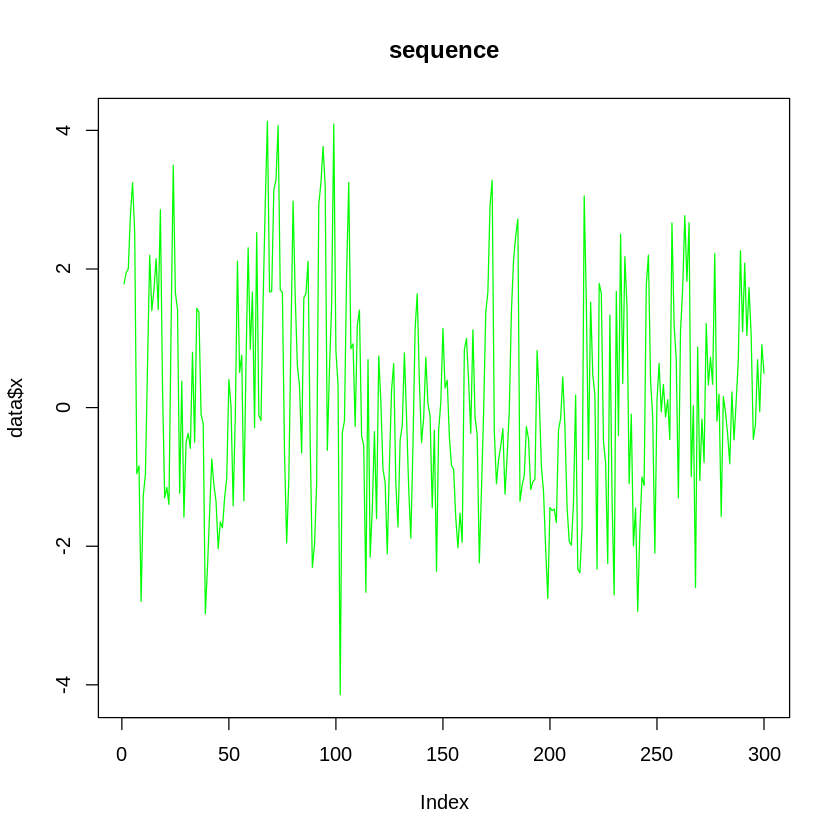

In [9]:
plot(data$x, col='green',main='sequence',type='l')

ACF - для MA

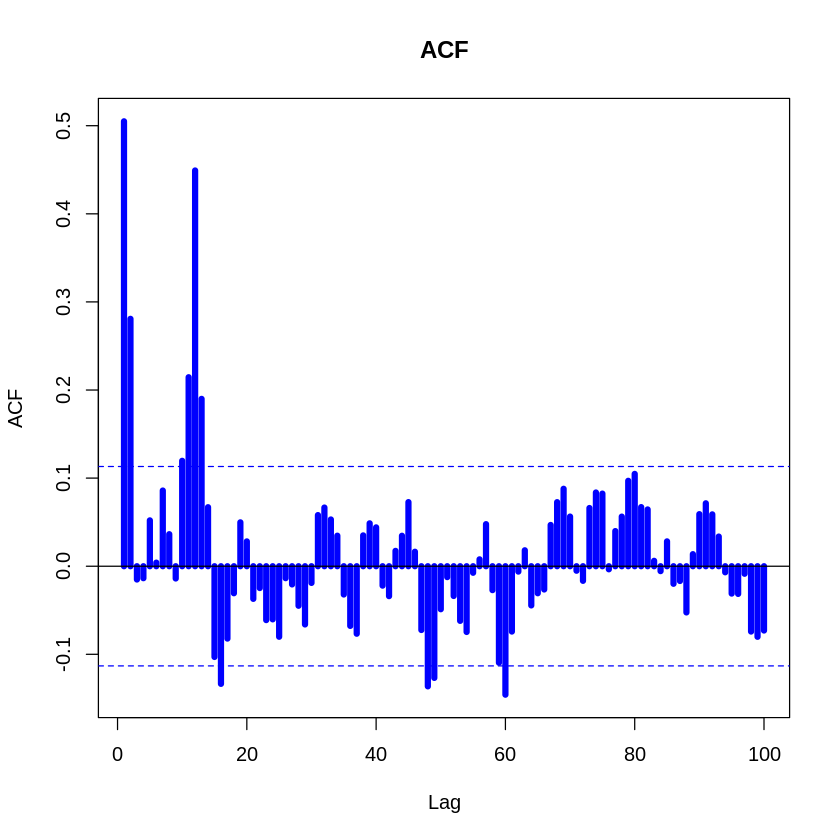

In [11]:
acf(data$x,lwd = 5, col = "blue", main = "ACF",  lag.max=100)

может быть MA(2) или MA(13)

PACF для AR

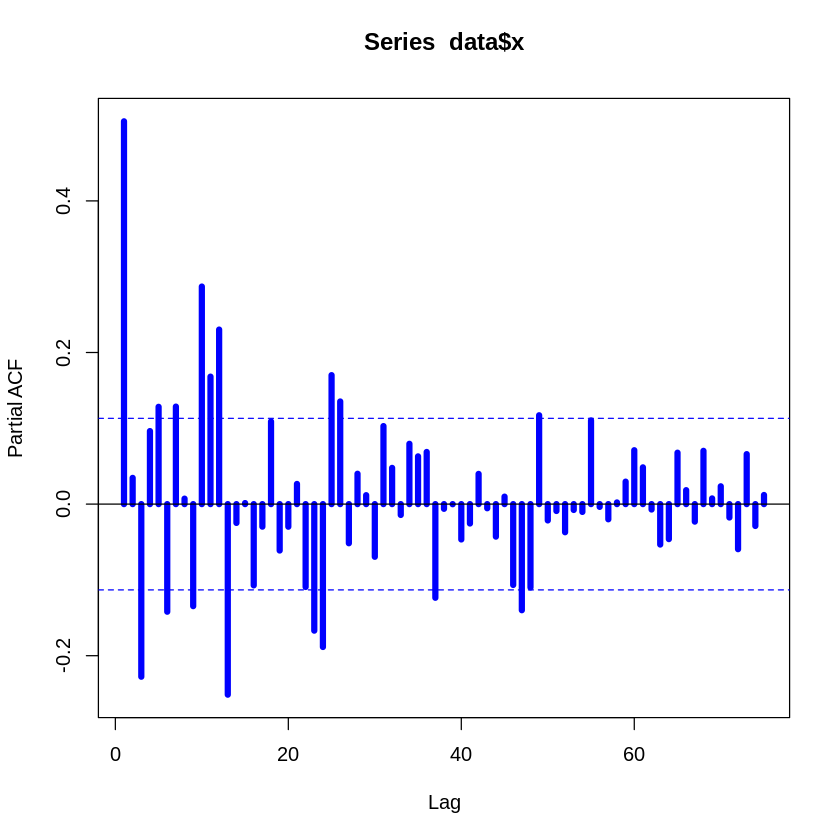

In [13]:
pacf(data$x,lwd = 5, col = "blue", lag.max=75)

как то не очень - скорее всего не AR - здесь затухание
AR(1)SAR(period = 12)

In [14]:
eacf(data$x)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o x x  x  x  o 
1 o x x o o o o o o o o  x  o  o 
2 x x o o o o x o o o o  x  o  x 
3 x x o o o o o o o o o  x  o  o 
4 x x o x o x o o o o o  x  x  o 
5 x o x x x o o o o o o  x  x  o 
6 x o x o x o o o o o o  x  x  o 
7 o x x o x o o o o o o  x  x  o 


можно взять ARMA(2, 2) еще

Условный метод наименьших квадратов

In [15]:
css1 <-  arima(data$x,order = c(0,0,2),method="CSS") # (AR, 0, MA)
css1$coef

ma1       ma2 intercept 
0.5746025 0.5323916 0.1484243

In [16]:
#Метод моментов (только для AR(p) моделей) с автоматическим выбором порядка модели по критерию Акаике

yw1 <- ar(data$x,method="yule-walker")
yw1$order
# и здесь так себе

[1] 24

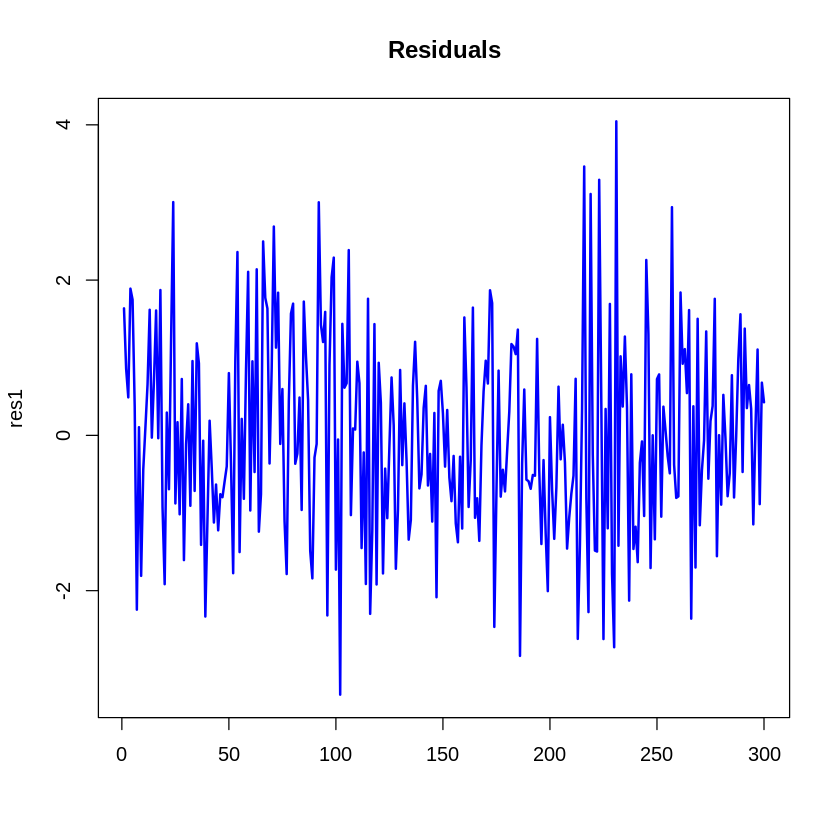

In [17]:
res1 <- css1$residuals
matplot(res1,lwd=2,type="l",col="blue",main="Residuals")

Пример использования теста Льюнг-Бокса для проверки 6 первых автокорреляций остатков. проверяется гипотеза случайности- независимости и одинаковой распределенности, но не в исходных данных, а именно в остатках после удаления модели ARMA

In [18]:
Box.test(res1, lag = 6, type = "Ljung-Box", fitdf = 2) # fitdf = sum(AR, 0, MA)


	Box-Ljung test

data:  res1
X-squared = 7.0612, df = 4, p-value = 0.1327


p-value > 0.05 - не отвергаем некоррелированность остатков

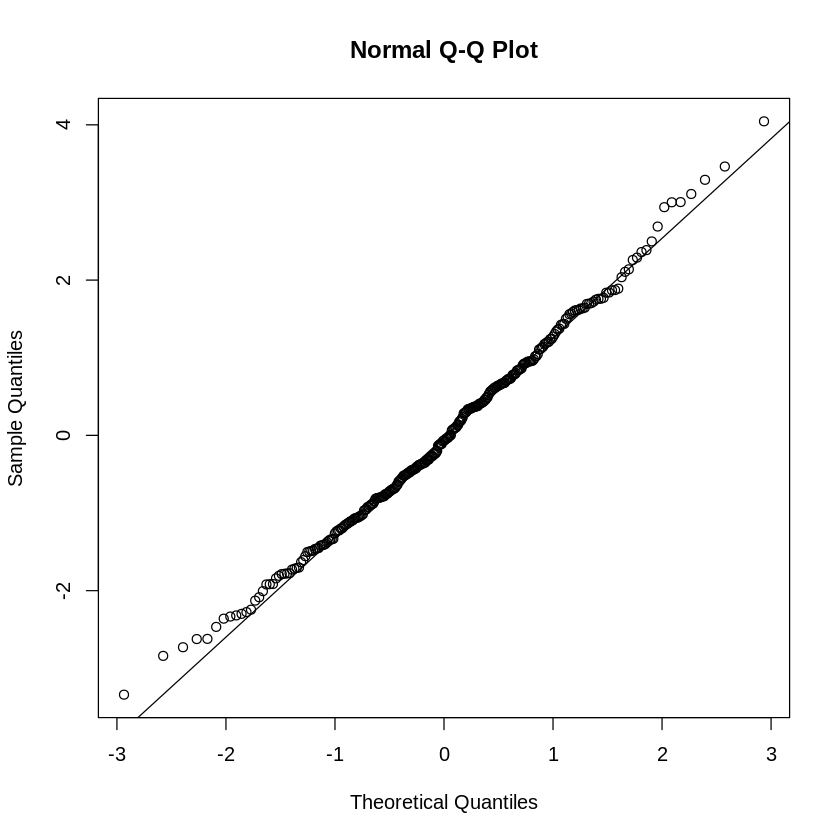

In [19]:
qqnorm(res1)
qqline(res1)

Если в остатках белый шум, то значение ACF остатков должны лежать в пределах $1/\sqrt{n}$

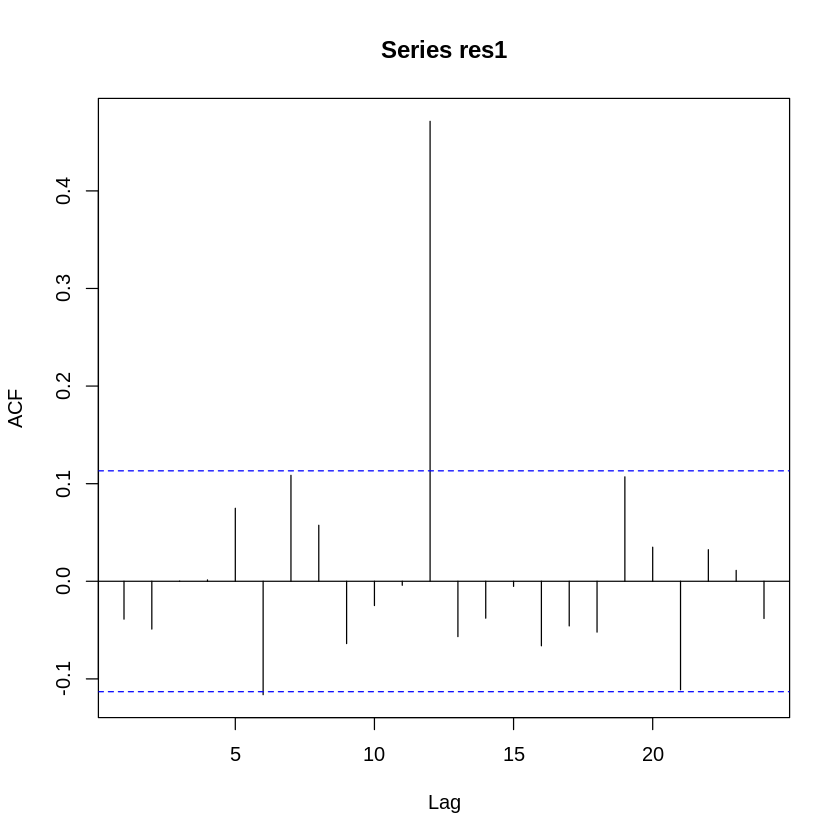

In [20]:
acf(res1)

не белый шум

In [21]:
css2 <-  arima(data$x,order = c(2,0,2),method="CSS") # (AR, 0, MA)
css2$coef

ar1        ar2        ma1        ma2  intercept 
-0.0398470 -0.4133611  0.5484192  0.9304840  0.1914941

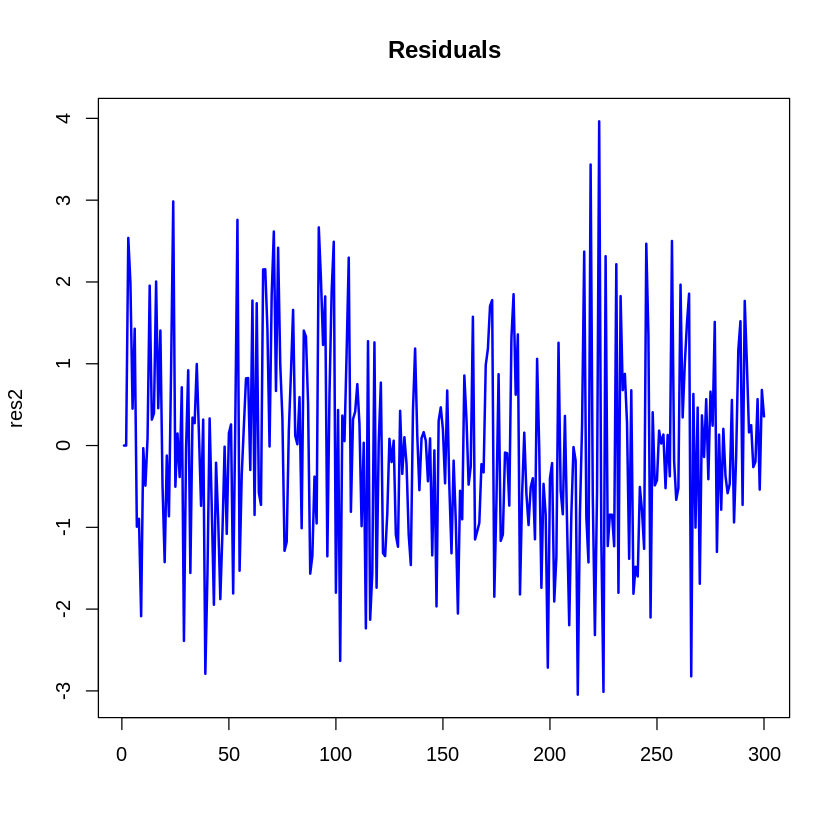

In [22]:
res2 <- css2$residuals
matplot(res2,lwd=2,type="l",col="blue",main="Residuals")

проведем тест Льюнг-Бокса остатков и постром qq-график

In [23]:
Box.test(res2, lag = 6, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  res2
X-squared = 9.663, df = 4, p-value = 0.0465


p-value < 0.05 - отвергаем некоррелированность остатков

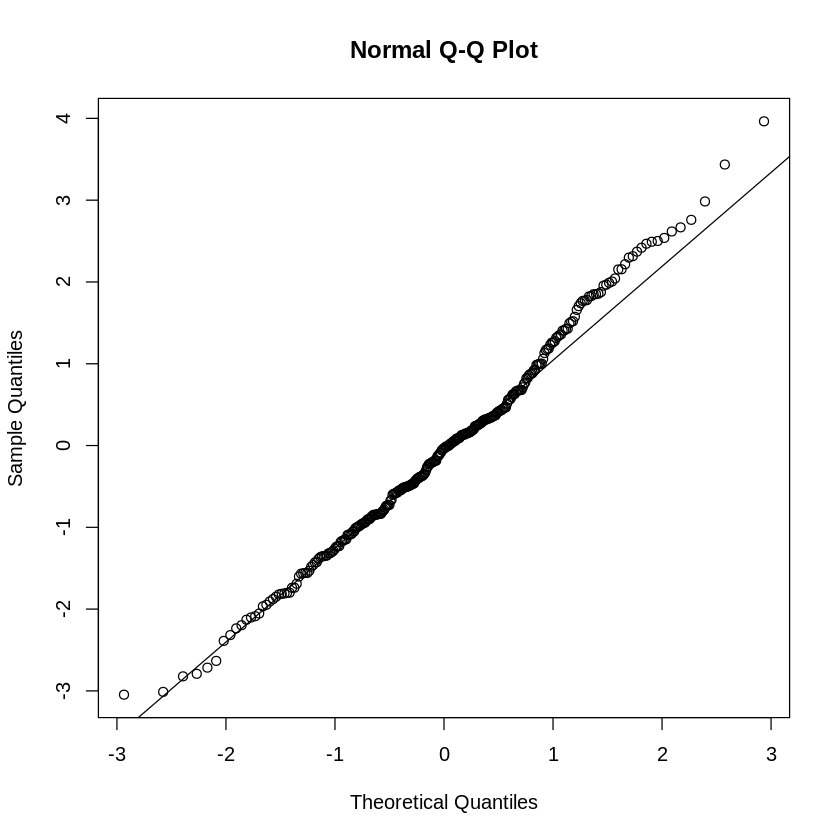

In [24]:
qqnorm(res2)
qqline(res2)

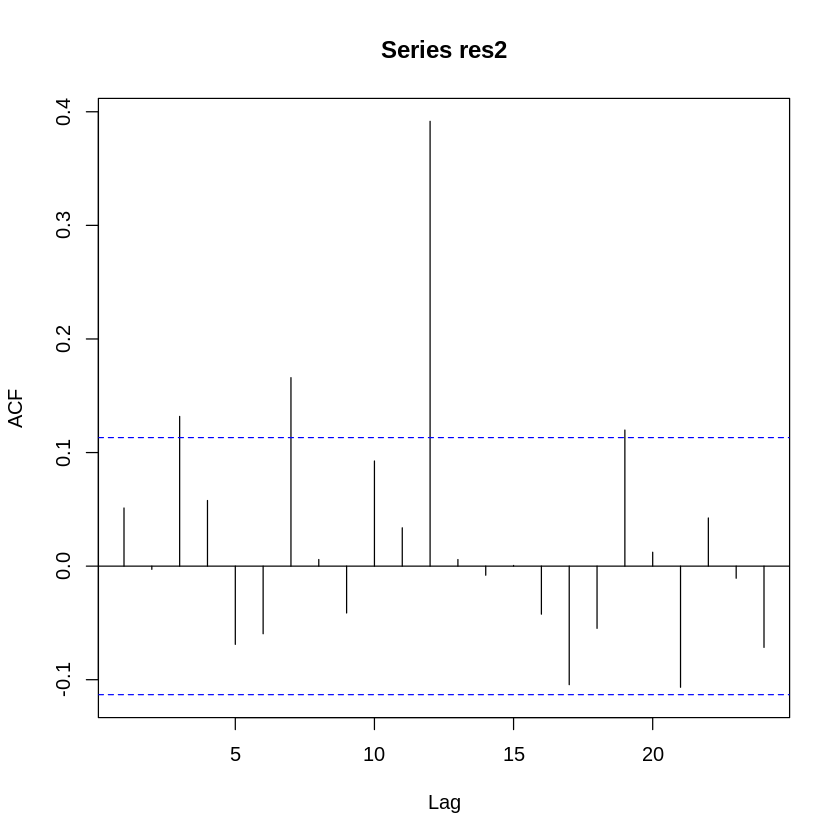

In [25]:
acf(res2)

In [26]:
css3 <-  arima(data$x,order = c(0,0,13),method="CSS") # (AR, 0, MA)
css3$coef

ma1          ma2          ma3          ma4          ma5          ma6 
 0.426204665  0.260533889  0.057154669  0.067048215  0.083534084 -0.020736700 
         ma7          ma8          ma9         ma10         ma11         ma12 
 0.039551574  0.049041916  0.004164251 -0.050586511  0.001077681  0.691743328 
        ma13    intercept 
 0.268092117  0.205322691

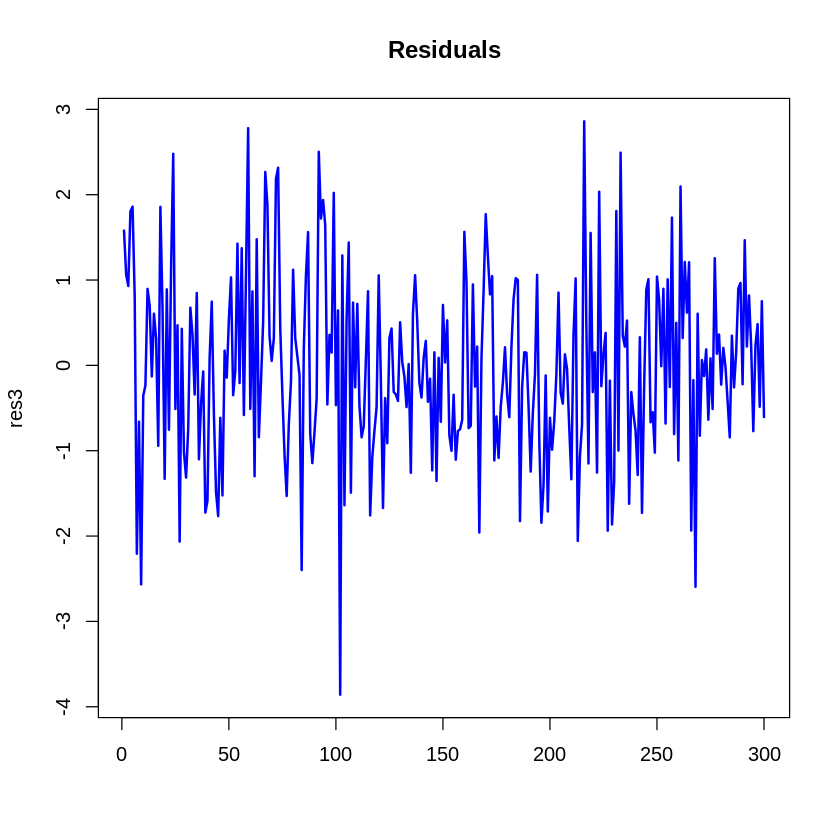

In [27]:
res3 <- css3$residuals
matplot(res3,lwd=2,type="l",col="blue",main="Residuals")

In [28]:
Box.test(res3, lag = 6, type = "Ljung-Box", fitdf = 13) # lag должен быть больше возможно нужно брать количество недель в году

Warning message in pchisq(STATISTIC, lag - fitdf):
“NaNs produced”



	Box-Ljung test

data:  res3
X-squared = 15.939, df = -7, p-value = NA


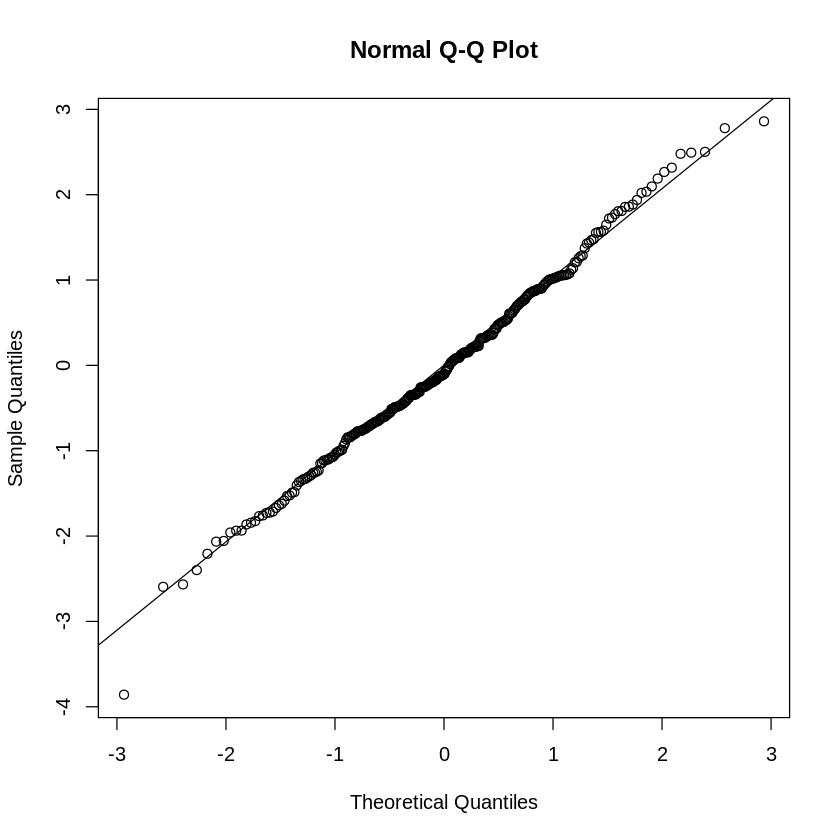

In [29]:
qqnorm(res3)
qqline(res3)

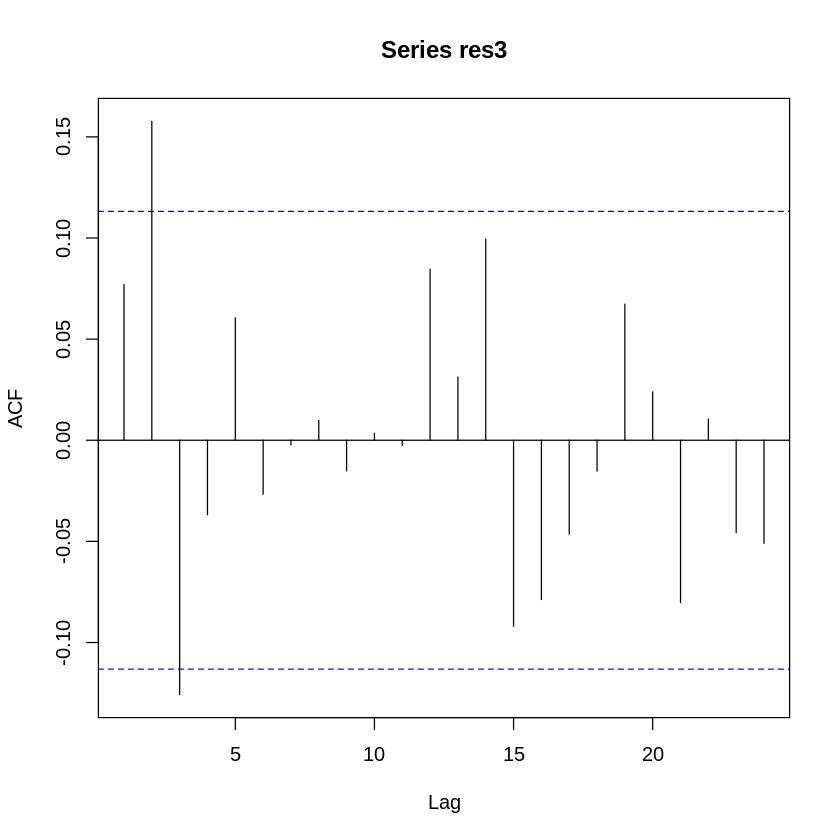

In [30]:
acf(res3)

Считается, что наилучшей будет модель с наименьшим значением критерия AIC.

In [31]:
ml_ma2 <-  arima(data$x,order = c(0,0,2),method="ML")
ml_ma13 <-  arima(data$x,order = c(0,0,13),method="ML")
ml_ar2_2 <-  arima(data$x,order = c(2,0,2),method="ML")
ml_ar1 <-  arima(data$x,order = c(1,0,0),method="ML")

In [32]:
ml_ma2$aic

[1] 1000.213

In [33]:
ml_ma13$aic

[1] 910.7292

In [34]:
ml_ar2_2$aic

[1] 983.3917

In [35]:
ml_ar1$aic

[1] 1029.92

чем меньше критерий Акаике - тем лучше

ARMA(0, 13) - кажется лучшая

In [52]:
model1 <- arima(data$x, order = c(0,0,2), seasonal = list(order= c(1,0,1),period = 12),method = "ML")

In [53]:
model1$aic

[1] 861.2788

In [55]:
model2 <- arima(data$x,order = c(3,0,1),seasonal = list(order= c(2,0,1),period = 12),method = "ML") # из другого решения

In [56]:
model2$aic # похуже

[1] 882.1191

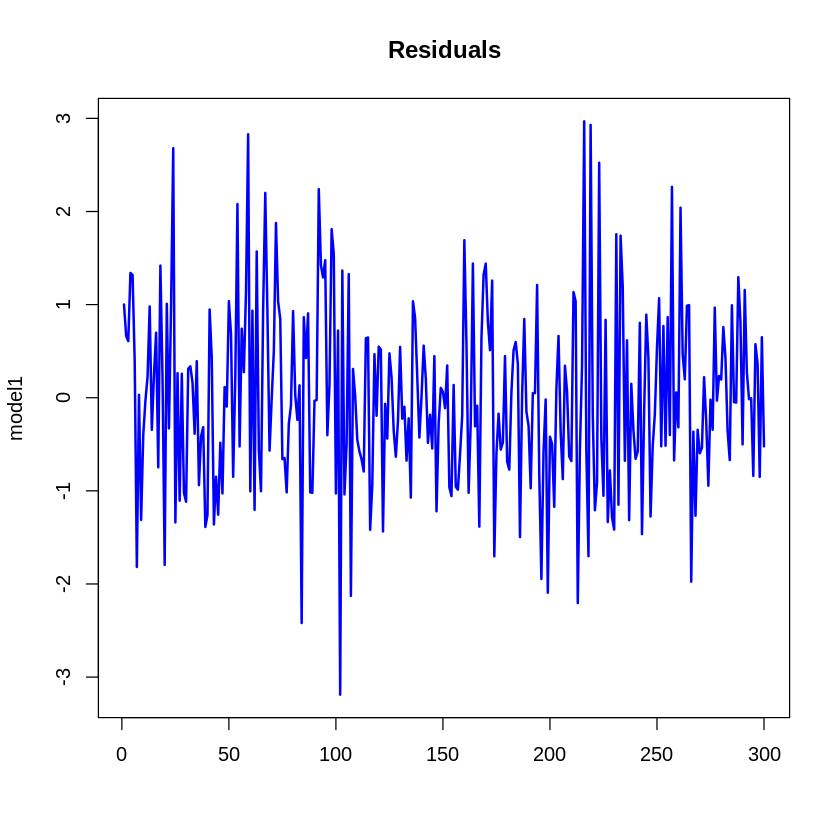

In [ ]:
model1 <- model1$residuals
matplot(model1,lwd=2,type="l",col="blue",main="Residuals")

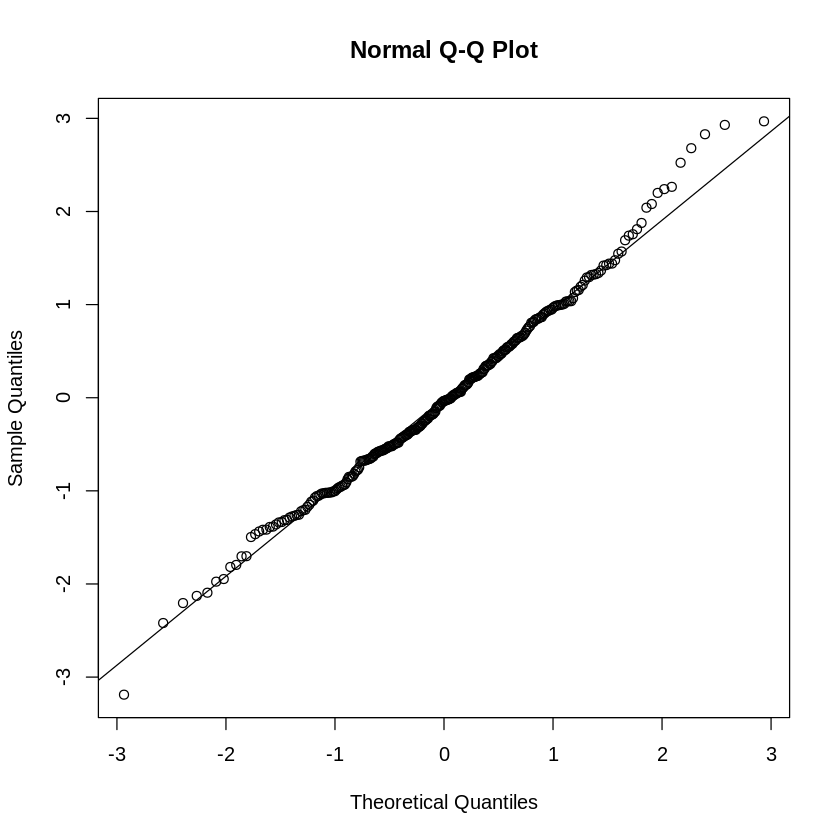

In [ ]:
qqnorm(model1)
qqline(model1)

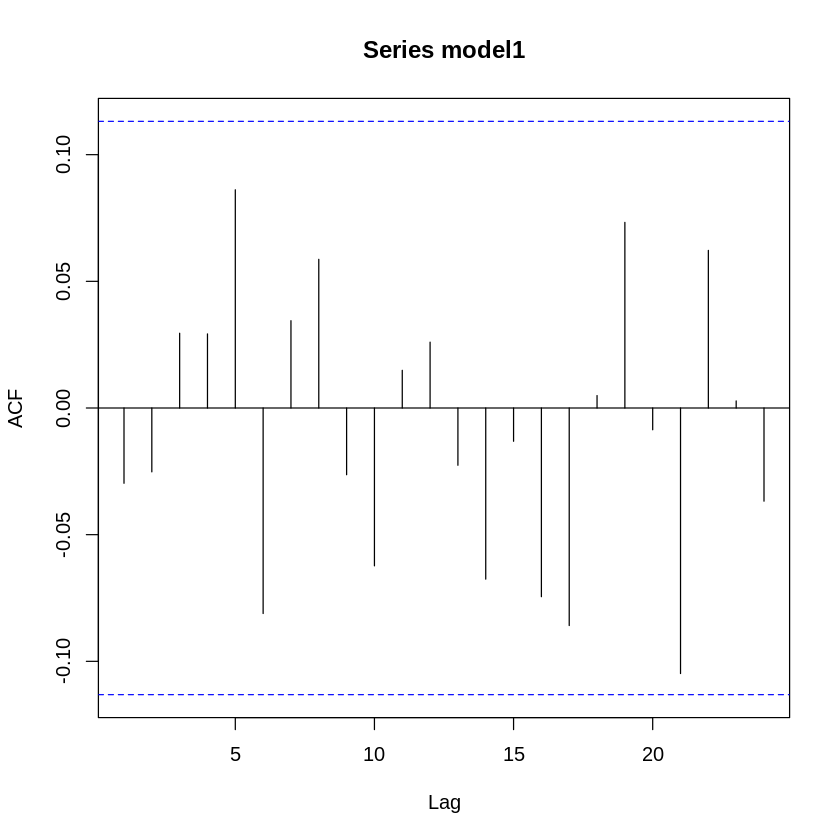

In [ ]:
acf(model1)

сезонная MA(2) SMA(12) фиг знает как догадаться - перебором